In [87]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

listings = pd.read_csv('listings.csv')
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            426 non-null    int64  
 1   listing_url                                   426 non-null    object 
 2   scrape_id                                     426 non-null    int64  
 3   last_scraped                                  426 non-null    object 
 4   source                                        426 non-null    object 
 5   name                                          426 non-null    object 
 6   description                                   413 non-null    object 
 7   neighborhood_overview                         228 non-null    object 
 8   picture_url                                   426 non-null    object 
 9   host_id                                       426 non-null    int

In [88]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [89]:
reviews = pd.read_csv('reviews.csv')
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24752 entries, 0 to 24751
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     24752 non-null  int64 
 1   id             24752 non-null  int64 
 2   date           24752 non-null  object
 3   reviewer_id    24752 non-null  int64 
 4   reviewer_name  24752 non-null  object
 5   comments       24745 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.1+ MB


In [90]:
calendar = pd.read_csv('calendar.csv')
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155490 entries, 0 to 155489
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   listing_id      155490 non-null  int64  
 1   date            155490 non-null  object 
 2   available       155490 non-null  object 
 3   price           155490 non-null  object 
 4   adjusted_price  0 non-null       float64
 5   minimum_nights  155490 non-null  int64  
 6   maximum_nights  155490 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 8.3+ MB


In [91]:
calendar.price = calendar.price.replace('[\$,]', '', regex=True).astype(float)

In [92]:
listings.price = listings.price.replace('[\$,]', '', regex=True).astype(float)

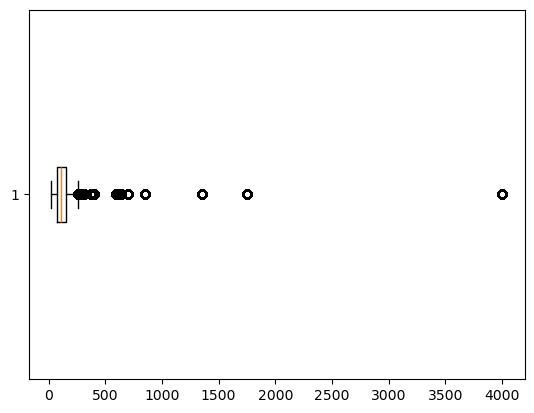

In [93]:
plt.boxplot(calendar.price, vert=False)
plt.show()


In [94]:
d1=calendar[calendar.price > 1000]['listing_id']
d1.unique()

array([ 621960198566758900,  928948908785846870, 1043698525924990350,
       1174544643387116469], dtype=int64)

In [95]:
reviews[reviews.listing_id == 621960198566758900]

,listing_id,id,date,reviewer_id,reviewer_name,comments
19475,621960198566758900,673105558031009712,2022-07-17,348626828,Alyssa,Thomas’ house is stunning. We had a big group ...
19476,621960198566758900,678222408585053861,2022-07-24,277496254,Jacqueline,Amazing. Book immediately
19477,621960198566758900,688384051145451231,2022-08-07,461938097,Matthew,From beginning to end Thomas made this stay an...
19478,621960198566758900,698489732186811330,2022-08-21,232120116,Amy,Gorgeous house with everything you could want ...
19479,621960198566758900,703664495924957566,2022-08-28,458913107,Kyle,Awesome house and a great host. Thanks Thomas!
19480,621960198566758900,1055134194482490468,2023-12-26,135364016,Adam,Amazing home! Thomas was there to meet us and ...
19481,621960198566758900,1056572173080835785,2023-12-28,290159157,Jennifer,The house was just beautiful! Very tastefully...
19482,621960198566758900,1166004858611391874,2024-05-27,15866414,Tiffany,"Just perfect! From the pool to decor, we loved..."
19483,621960198566758900,1169628524648800219,2024-06-01,31252084,Rachael,"Beautiful house, and the pool was the best!"
19484,621960198566758900,1184079532468594308,2024-06-21,89870226,Shey,Beautiful home and well appointed with all the...


In [96]:
listings[listings.id == 621960198566758900]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
164,621960198566758900,https://www.airbnb.com/rooms/621960198566758900,20240905032005,2024-09-05,city scrape,One-of-a-Kind Luxe Urban Farmhouse w/ Heated Pool,4800ft of living space and an epic backyard ma...,"Walkable, Safe and quiet",https://a0.muscache.com/pictures/dd1a2e33-d50b...,382970529,...,5.0,4.91,5.0,NaN,f,12,2,10,0,0.42


In [97]:
print(listings.shape)
exploded = listings.explode('amenities').reset_index(drop=True)
listings['amenities']
#dummies = pd.get_dummies(exploded['amenities'], prefix='')
#result = dummies.groupby(exploded.index).sum()

# Combine with the original dataframe if you want other columns retained
#final_df = listings.join(result, rsuffix='_OHC')
#print(final_df.shape)
#final_df.head()

(426, 75)


0      ["TV with standard cable", "Air conditioning",...
1      ["Iron", "Shampoo", "Cooking basics", "Free dr...
2      ["Backyard", "Iron", "Shampoo", "Cooking basic...
3      ["Iron", "Shampoo", "Cooking basics", "Kitchen...
4      ["Pocket wifi", "Smart lock", "Iron", "Shampoo...
                             ...                        
421    ["Coffee", "Smart lock", "Cleaning products", ...
422    ["Clothing storage: closet", "Smart lock", "Cl...
423    ["Coffee", "Clothing storage: closet", "Cleani...
424    ["Wifi", "Free parking on premises", "Washer",...
425    ["Air conditioning", "Carbon monoxide alarm", ...
Name: amenities, Length: 426, dtype: object

In [98]:
df1 = calendar.drop_duplicates(subset=['listing_id'], keep='first').set_index('listing_id')
df2 = listings.set_index('id')
df2['actual_price'] = df1['price']
df2.reset_index(inplace=True)
df2 = pd.get_dummies(df2, columns=['host_response_time',  'host_is_superhost', 'room_type', 'neighbourhood_cleansed'], drop_first=True)
droplist = ['listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
        'host_acceptance_rate', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_group_cleansed', 
       'property_type',  'bathrooms_text',
        'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90',  'calendar_last_scraped',
        'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 
        'license',
       'instant_bookable', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms']
#df2.fillna(subset=['host_response_rate','reviews_per_month', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'beds', 'bathrooms', 'bedrooms'], inplace=True)

df2.host_response_rate = df2.host_response_rate.replace('[%]', '', regex=True).astype(float)
df2 =df2.drop(droplist, axis=1)
df2.fillna(0, inplace=True)

#df2 = df2.drop(['picture_url', 'host_listings_count', 'host_total_listings_count', 'host_verifications','neighbourhood','property_type', 'bathrooms_text',  'amenities'], axis=1)
#df2 = df2[['actual_price', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms','beds','number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable','reviews_per_month']]

In [304]:
df2[df2.actual_price < 500].actual_price.describe()

count    417.000000
mean     121.467626
std       65.015712
min       22.000000
25%       75.000000
50%      109.000000
75%      149.000000
max      399.000000
Name: actual_price, dtype: float64

In [100]:
df2.actual_price.describe()

count     426.000000
mean      152.953052
std       295.819631
min        22.000000
25%        77.000000
50%       110.000000
75%       150.000000
max      4000.000000
Name: actual_price, dtype: float64

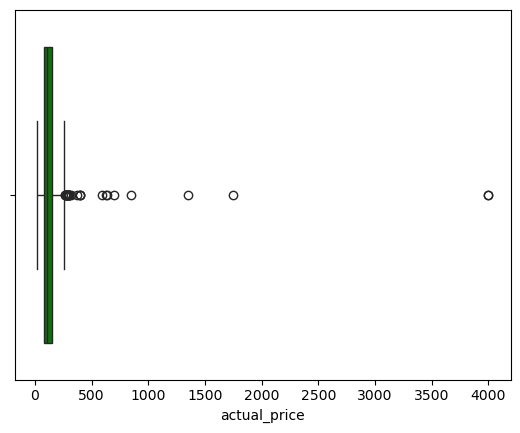

In [101]:
#plot price distribution
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns   
sns.boxplot(df2.actual_price, orient="h", color="Green")
plt.show()

In [102]:
df2.corr()['actual_price'].sort_values(ascending=False)
print(df2.shape)
df2=df2[df2['actual_price']<200]
print(df2.shape)
print(df2.corr()['actual_price'].sort_values(ascending=False))


(426, 39)
(375, 39)
actual_price                              1.000000
accommodates                              0.578136
bedrooms                                  0.414271
beds                                      0.390060
id                                        0.129834
neighbourhood_cleansed_TWELFTH WARD       0.113713
host_response_time_within an hour         0.104485
neighbourhood_cleansed_SIXTH WARD         0.087539
neighbourhood_cleansed_FIRST WARD         0.084014
longitude                                 0.080578
neighbourhood_cleansed_SECOND WARD        0.077285
neighbourhood_cleansed_FIFTEENTH WARD     0.056206
bathrooms                                 0.029332
neighbourhood_cleansed_FOURTH WARD        0.027401
neighbourhood_cleansed_TENTH WARD         0.025379
availability_365                          0.001247
reviews_per_month                        -0.012501
neighbourhood_cleansed_THIRD WARD        -0.015651
host_is_superhost_t                      -0.021745
host_respon

id


<Axes: >

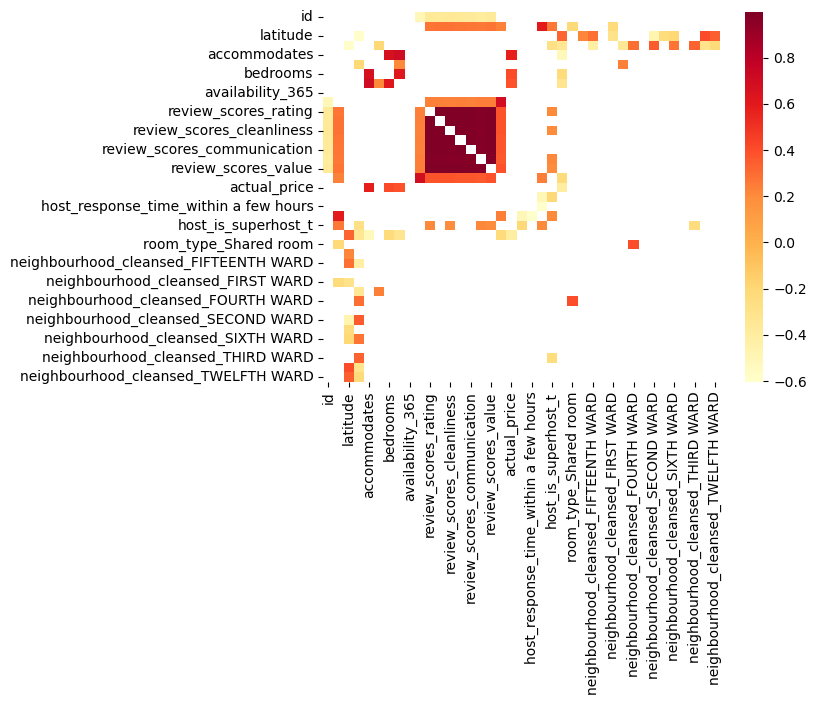

In [103]:
#plot heatmap of the price correlation
import seaborn as sns
filtered_corr = df2.corr()[df2.corr() !=1.0]
print(filtered_corr.columns[0])
filtered_corr = filtered_corr[abs(filtered_corr)>0.2]
sns.heatmap(filtered_corr, annot=False, cmap='YlOrRd')  

C:\Users\gandh\AppData\Local\Temp\ipykernel_29692\2808586169.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


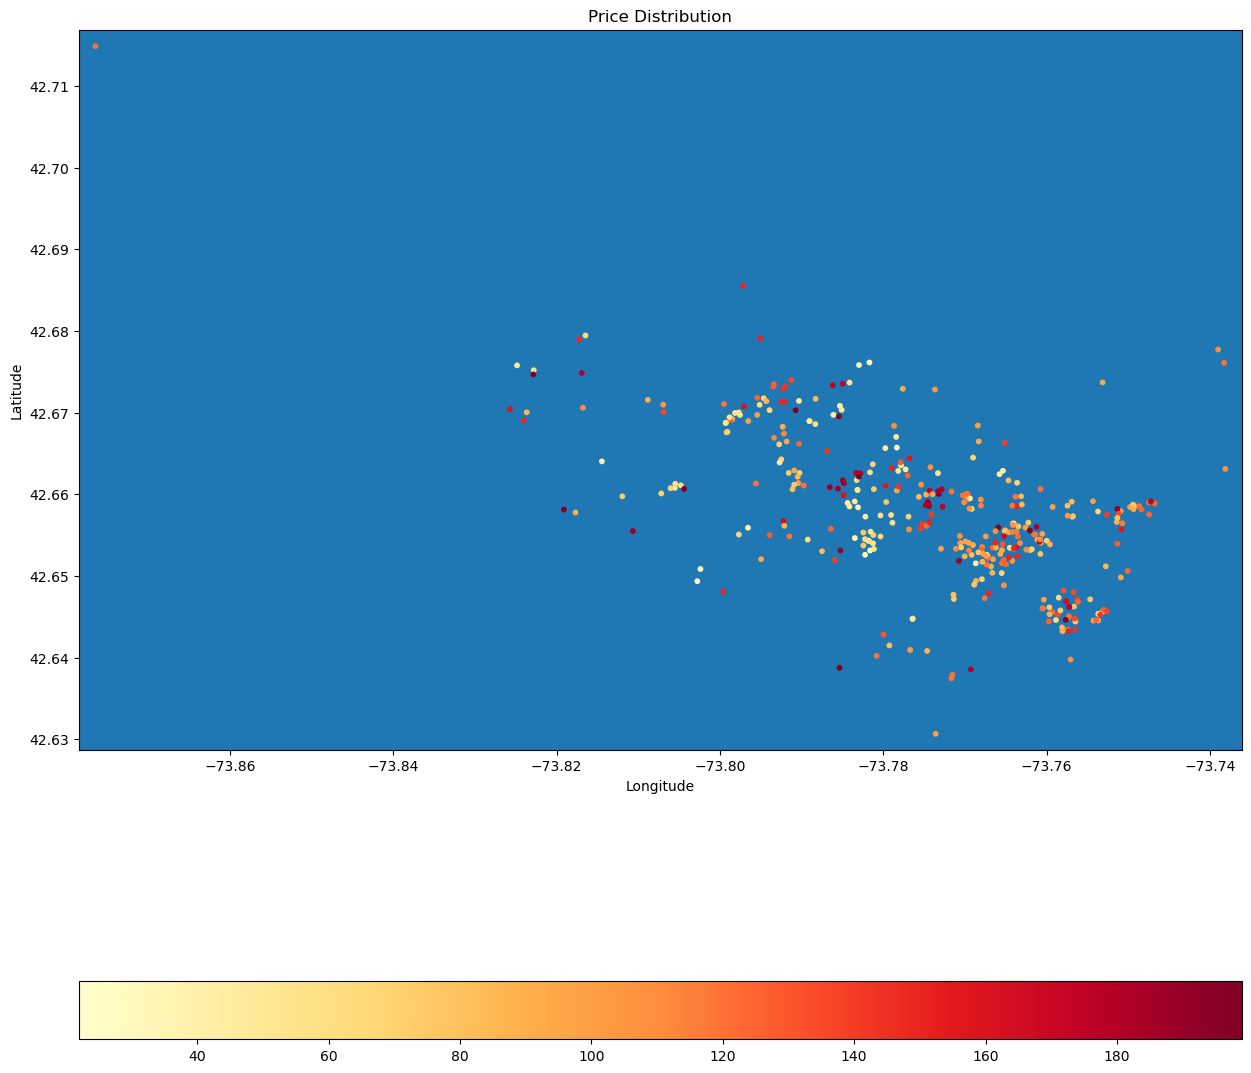

In [104]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(df2, geometry=gpd.points_from_xy(df2.longitude, df2.latitude))
fig, ax = plt.subplots(figsize=(15, 20))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax)  # Background map
gdf.plot(column='actual_price', ax=ax, legend=True, legend_kwds={'orientation': "horizontal"},cmap='YlOrRd', markersize=10)
padding = 0.002  # Adjust the padding as needed
minx, maxx = gdf['longitude'].min() - padding, gdf['longitude'].max() + padding
miny, maxy = gdf['latitude'].min() - padding, gdf['latitude'].max() + padding
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Price Distribution")
plt.show()

In [105]:
import folium
from folium.plugins import MarkerCluster
import branca.colormap as cm

# Initialize the map centered on the average coordinates
m = folium.Map(location=[df2['latitude'].mean(), df2['longitude'].mean()], zoom_start=10, width='100%', height='80%')

# Add a marker cluster layer
marker_cluster = MarkerCluster().add_to(m)
min_price = df2['actual_price'].min()
max_price = df2['actual_price'].max()
colormap = cm.LinearColormap(colors=['green', 'yellow', 'red'], vmin=min_price, vmax=max_price)
colormap.caption = 'Price Scale'
# Plot each point
for idx, row in df2.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=5,
        color=colormap(row['actual_price']),
        fill=True,
        fill_color=colormap(row['actual_price']),
        fill_opacity=0.6,
        popup=f"Price: ${row['actual_price']}"
    ).add_to(marker_cluster)

# Show the map
m


In [106]:

from sklearn.model_selection import train_test_split
random_state = 5000
df2 = pd.read_csv('final_df.csv')
df2['sentiment'] = df2['sentiment'].fillna(3)
###


X = df2.drop(['actual_price','id', 'listing_id', 'Unnamed: 0'], axis=1)
X = X.astype({col: 'float32' for col in X.select_dtypes(include='bool').columns})

X['bedrooms'] = X['bedrooms'].replace(0, 1)
X['beds'] = X['beds'].replace(0, 1)

y = df2['actual_price']/X['accommodates']#normalize price by number of guests

y = y/X['bedrooms']
y = y/X['beds']

X = X.drop(['accommodates', 'bedrooms','beds'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=random_state, shuffle=True)

In [306]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
print(X.columns)


Index(['host_response_rate', 'latitude', 'longitude', 'bathrooms',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin',
       ...
       'open 24 hours', 'pool toys', 'pour-over coffee', 'premium cable',
       'standard cable', 'stationary bike', 'treadmill', 'wardrobe',
       'workout bench', 'yoga mat'],
      dtype='object', length=451)


In [258]:

%%time

lm = LinearRegression()
lm.fit(X_train, y_train)


CPU times: total: 62.5 ms
Wall time: 50 ms


LinearRegression()

In [307]:

y_pred = lm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
lm_rmse = np.sqrt(mse)
print('RMSE: ', lm_rmse)
#compute rsquared
r_squared = lm.score(X_test, y_test)
print('R-squared:', r_squared)
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)
mape = mean_absolute_percentage_error(y_test, y_pred)
print('MAPE:', mape)

RMSE:  106.3535036841034
R-squared: -14.837872608470057
MAE: 78.22345550627021
MAPE: 13.951213315113213


In [269]:
%%timeit
y_pred = lm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
lm_rmse = np.sqrt(mse)

7.06 ms ± 277 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [270]:

%%time

# Model
dtr = DecisionTreeRegressor(max_depth=3, random_state=42)
dtr.fit(X_train, y_train)


CPU times: total: 15.6 ms
Wall time: 9 ms


DecisionTreeRegressor(max_depth=3, random_state=42)

In [271]:
%%timeit
# Predictions
y_pred = dtr.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


6.95 ms ± 164 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [308]:
y_pred = dtr.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = dtr.score(X_test, y_test)
print('R-squared:', r_squared)
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)
mape = mean_absolute_percentage_error(y_test, y_pred)    
print('MAPE:', mape)

R-squared: 0.5135048808945357
MAE: 14.97479129646058
MAPE: 1.6511817051919735


In [273]:

print(rmse)
# Model
rfr = RandomForestRegressor(n_estimators=3, random_state=42, max_depth=4, max_leaf_nodes=200)
rfr.fit(X_train, y_train)


18.639858997842186


RandomForestRegressor(max_depth=4, max_leaf_nodes=200, n_estimators=3,
                      random_state=42)

In [274]:
%%timeit
# Predictions
y_pred = rfr.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)



7.44 ms ± 187 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [309]:

# Predictions
y_pred = rfr.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = rfr.score(X_test, y_test)
print('R-squared:', r_squared)
mae = mean_absolute_error(y_test, y_pred)    
print('MAE:', mae)
mape = mean_absolute_percentage_error(y_test, y_pred)    
print('MAPE:', mape)

R-squared: 0.49005171508986123
MAE: 15.04892063707625
MAPE: 1.6088983077564123


In [289]:
print(rmse)
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rfr.feature_importances_
})


print(importance_df.nlargest(15, 'Importance')['Feature'].tolist())
print(importance_df.nlargest(15, 'Importance')['Importance'].tolist())

20.209561530294838
['room_type_Private room', 'Indoor fireplace', 'longitude', 'review_scores_communication', 'bathrooms', 'Free washer \\u2013 In building', 'Fast wifi \\u2013 339 Mbps', 'GE stainless steel gas stove', 'review_scores_value', 'review_scores_accuracy', 'Elevator', 'Extra pillows and blankets', 'Exterior security cameras on property', 'Toaster', 'availability_365']
[0.3081727475686591, 0.14055272836966295, 0.12027949432972768, 0.0700861724570885, 0.04343671886175487, 0.02774938023094622, 0.02670500738571888, 0.026698182259475695, 0.022023651113491652, 0.021536101163429553, 0.02110582298051332, 0.017405891453026526, 0.015807933106370946, 0.013423881563510057, 0.012852896338435922]


In [277]:
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rfr.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                         Feature  Importance
18        room_type_Private room    0.308173
257             Indoor fireplace    0.140553
2                      longitude    0.120279
10   review_scores_communication    0.070086
3                      bathrooms    0.043437
..                           ...         ...
158    Fast wifi \u2013 453 Mbps    0.000000
157    Fast wifi \u2013 433 Mbps    0.000000
156    Fast wifi \u2013 421 Mbps    0.000000
155    Fast wifi \u2013 384 Mbps    0.000000
450                     yoga mat    0.000000

[451 rows x 2 columns]


In [278]:
%time

# Model
svr = SVR(kernel='linear', C=1, gamma=0.1)
svr.fit(X_train, y_train.ravel())  # SVR expects 1D target


CPU times: total: 0 ns
Wall time: 0 ns


C:\Users\gandh\AppData\Local\Temp\ipykernel_29692\1357022283.py:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  svr.fit(X_train, y_train.ravel())  # SVR expects 1D target


SVR(C=1, gamma=0.1, kernel='linear')

In [279]:
%%timeit
# Predictions
y_pred = svr.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


12.5 ms ± 287 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [310]:
# Predictions
y_pred = svr.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = svr.score(X_test, y_test)
print('R-squared:', r_squared)
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)
mape = mean_absolute_percentage_error(y_test, y_pred)
print('MAPE:', mape)

R-squared: 0.3874540365979726
MAE: 17.142317536680256
MAPE: 1.960255509813143


In [281]:
%time
print(rmse)


# Model
xgbr = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=5, random_state=42)
xgbr.fit(X_train, y_train)


CPU times: total: 0 ns
Wall time: 0 ns
20.9157152285786


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=5, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [291]:
%%timeit
# Predictions
y_pred = xgbr.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


107 ms ± 1.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [311]:

# Predictions
y_pred = xgbr.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = xgbr.score(X_test, y_test)  
print('R-squared:', r_squared)
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)
mape = mean_absolute_percentage_error(y_test, y_pred)
print('MAPE:', mape)

R-squared: 0.42811721421022764
MAE: 16.654701179195392
MAPE: 2.0173042419459453


In [284]:
print(rmse)

20.209561530294838


In [285]:
df2.review_scores_rating.describe() 

count    417.000000
mean       4.090264
std        1.690023
min        0.000000
25%        4.550000
50%        4.800000
75%        4.950000
max        5.000000
Name: review_scores_rating, dtype: float64